# Functions and iteration

We will also use the `pprint()` function (short for pretty print) from the standard library pprint module to make the list output a little more readable.

In [ ]:
from pathlib import Path
from pprint import pprint

def print_files(filenames):
    # Set up the loop iteration instructions
    for name in filenames:
        # Use pathlib.Path to print out each file
        print(Path(name).read_text())
        
def list_files(filenames):
    # Use pathlib.Path to read the contents of each file
    return [Path(name).read_text()
            # Obtain each name from the list of filenames
            for name in filenames]

filenames = "diabetes.txt", "boston.txt", "digits.txt", "iris.txt", "wine.txt"
print_files(filenames)
pprint(list_files(filenames))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

# Find matches

*   Define a `get_matches()` function that will allow us to search through all of that text.
*   When we pass a query string to get_matches() it will return only the lines that contain the query string.
*   To filter out lines that do not match, `get_matches()` includes an `if` clause in its list comprehension.
*   The `if` clauses in list comprehensions always go after `for` clauses.
*   We will use `get_matches()` to extract lines that include the number of rows and columns in each dataset description.



In [ ]:
from pathlib import Path
from pprint import pprint

def get_matches(filename, query):
    # Filter the list comprehension using an if clause
    return [line for line in Path(filename).open() if query in line] # คำตอบเป็น list

# Iterate over files to find all matching lines
matches = [get_matches(name, "Number of") for name in filenames] # พอมาเขียนเบบนี้เลยเป็น nested list
pprint(matches)

[['  :Number of Instances: 442\n',
  '  :Number of Attributes: First 10 columns are numeric predictive values\n'],
 ['    :Number of Instances: 506 \n',
  '    :Number of Attributes: 13 numeric/categorical predictive. Median Value '
  '(attribute 14) is usually the target.\n'],
 ['    :Number of Instances: 5620\n', '    :Number of Attributes: 64\n'],
 ['    :Number of Instances: 150 (50 in each of three classes)\n',
  '    :Number of Attributes: 4 numeric, predictive attributes and the '
  'class\n'],
 ['    :Number of Instances: 178 (50 in each of three classes)\n',
  '    :Number of Attributes: 13 numeric, predictive attributes and the '
  'class\n']]


# Dataset dimensions

The output from the previous exercise was a nested list, or more specifically a list of lists of strings. Next, we will define a function called `flatten()` to flatten this list of lists into a simple list.

*   Generator allows us to use the `zip()` function to elegantly pair the numbers we will extract from the `matches` variable.

*   As `zip()` pairs numbers, the number generator will keep track of which numbers come next until it runs out of values.

### After we use `zip()` to pair up the number of rows and columns from each dataset description, we will use` zip()` again to match dataset names and dimensions.

In [ ]:
from pathlib import Path
from pprint import pprint
matches = [['    :Number of Instances: 442\n', '    :Number of Attributes: First 10 columns are numeric predictive values\n'],
           ['    :Number of Instances: 506 \n', '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n'],
           ['    :Number of Instances: 5620\n', '    :Number of Attributes: 64\n'], 
           ['    :Number of Instances: 150 (50 in each of three classes)\n', '    :Number of Attributes: 4 numeric, predictive attributes and the class\n'],
           ['    :Number of Instances: 178 (50 in each of three classes)\n', '    :Number of Attributes: 13 numeric, predictive attributes and the class\n']]
filenames = "diabetes.txt", "boston.txt", "digits.txt", "iris.txt", "wine.txt"

def flatten(nested_list):
    return (item 
            # Obtain each list from the list of lists
            for sublist in nested_list
            # Obtain each element from each individual list
            for item in sublist)
    
    # flatter output is a generator

# See how flatten works

for i in (flatten(matches)):
    print(i)


# extract each element from every list so that the strings can be combined into one final list.

number_generator = (int(substring) for string in flatten(matches)
                    for substring in string.split() if substring.isdigit())

# See what the number_generator is 442, 10, 506, 13, ...

for i in number_generator:
    print(i)
print("===================================================")

# See how the generators are zipped together

number_generator = (int(substring) for string in flatten(matches)
                    for substring in string.split() if substring.isdigit())

for i, j in zip(number_generator, number_generator):
     print(i, j)
print("===================================================")


number_generator = (int(substring) for string in flatten(matches)
                    for substring in string.split() if substring.isdigit())

for i, j in zip(filenames, zip(number_generator, number_generator)):
    print(i, j)

print("===================================================")

# Notice that in dictionary, orders are random.

number_generator = (int(substring) for string in flatten(matches)
                    for substring in string.split() if substring.isdigit())
pprint(dict(zip(filenames, zip(number_generator, number_generator))))


    :Number of Instances: 442

    :Number of Attributes: First 10 columns are numeric predictive values

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Number of Instances: 5620

    :Number of Attributes: 64

    :Number of Instances: 150 (50 in each of three classes)

    :Number of Attributes: 4 numeric, predictive attributes and the class

    :Number of Instances: 178 (50 in each of three classes)

    :Number of Attributes: 13 numeric, predictive attributes and the class

442
10
506
13
5620
64
150
4
178
13
442 10
506 13
5620 64
150 4
178 13
diabetes.txt (442, 10)
boston.txt (506, 13)
digits.txt (5620, 64)
iris.txt (150, 4)
wine.txt (178, 13)
{'boston.txt': (506, 13),
 'diabetes.txt': (442, 10),
 'digits.txt': (5620, 64),
 'iris.txt': (150, 4),
 'wine.txt': (178, 13)}


# Note for myself

## การทำงานของ zip เมื่อใช้กับ list และ generator จะออกมาต่างกัน เช่น 
```
g = [i for i in range(6)]
for i, j in zip(g, g):
    print(i, j)

0 0
1 1
2 2
3 3
4 4
5 5
```

ในขณะที่ถ้าใช้ generator มันจะเอาตัวถัดไปมาต่อกัน นี่เป็นคุณสมบัติของ generator

```
g = (i for i in range(6))
for i,j  in zip(g, g):
    print(i, j)

0 1
2 3
4 5
```





# Extract words

Define three functions that can be combine to extract and count words from a text file.

1.   The `obtain_words()` function uses a conditional expression to replace non-letter characters with spaces so that it can return words without punctuation.

    *   Check if each character in the input string is a letter with the `.isalpha()` string method.

2.   The `filter_words()` function use a list comprehension with an `if` clause to remove words shorter than the minimum_length threshold.
    *  Set up the `if` clause to remove words shorter than three characters.



In [ ]:
from pathlib import Path
from pprint import pprint 

# Figure out what the .read_text() method of the Path object is doing.

print(Path("diabetes.txt").read_text())
print("==================================================================================================================================================")
print(Path("diabetes.txt").read_text().lower())
print("==================================================================================================================================================")
display(Path("diabetes.txt").read_text().lower())

# See what this generator is for the first few 20 items.
g = (char if char.isalpha() else " " for char in Path("diabetes.txt").read_text().lower())
for i in range(20):
    print(next(g))
print("==================================================================================================================================================")
# What happens when this generator is joined
g = (char if char.isalpha() else " " for char in Path("diabetes.txt").read_text().lower())
display("".join(g))
print("==================================================================================================================================================")
# Tokenize each word into a list of string.
g = (char if char.isalpha() else " " for char in Path("diabetes.txt").read_text().lower())
g = "".join(g).split()
display(g[:7])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

'.. _diabetes_dataset:\n\ndiabetes dataset\n----------------\n\nten baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**data set characteristics:**\n\n  :number of instances: 442\n\n  :number of attributes: first 10 columns are numeric predictive values\n\n  :target: column 11 is a quantitative measure of disease progression one year after baseline\n\n  :attribute information:\n      - age\n      - sex\n      - body mass index\n      - average blood pressure\n      - s1\n      - s2\n      - s3\n      - s4\n      - s5\n      - s6\n\nnote: each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nsource url:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

 
 
 
 
d
i
a
b
e
t
e
s
 
d
a
t
a
s
e
t


'    diabetes dataset   diabetes dataset                   ten baseline variables  age  sex  body mass index  average blood pressure  and six blood serum measurements were obtained for each of n       diabetes patients  as well as the response of interest  a quantitative measure of disease progression one year after baseline     data set characteristics        number of instances          number of attributes  first    columns are numeric predictive values     target  column    is a quantitative measure of disease progression one year after baseline     attribute information          age         sex         body mass index         average blood pressure         s          s          s          s          s          s   note  each of these    feature variables have been mean centered and scaled by the standard deviation times  n samples   i e  the sum of squares of each column totals      source url  https   www  stat ncsu edu  boos var select diabetes html  for more information see  br

['diabetes', 'dataset', 'diabetes', 'dataset', 'ten', 'baseline', 'variables']

# Shit, the same complicated code above should be done easily with `Regex` !

In [ ]:
import re
from pathlib import Path
re.findall(r"[A-Za-z]+", Path("diabetes.txt").read_text().lower())[:7]

['diabetes', 'dataset', 'diabetes', 'dataset', 'ten', 'baseline', 'variables']

In [ ]:
# Question
from pathlib import Path 
from pprint import pprint

def obtain_words(string):
    # Replace non-alphabetic characters with spaces
    return "".join(char if char.isalpha() else " " for char in string).split()

def filter_words(words, minimum_length=12):
    # Remove words shorter than 3 characters
    return [word for word in words if len(word) >= minimum_length]

words = obtain_words(Path("diabetes.txt").read_text().lower())
filtered_words = filter_words(words)
pprint(filtered_words)

['measurements', 'quantitative', 'characteristics', 'quantitative']


# Below is my version using re module.

In [ ]:
from pathlib import Path 
from pprint import pprint
import re

def obtain_words(string):
    # Replace non-alphabetic characters with spaces
    return re.findall(r"[A-Za-z]+", string)

def filter_words(words, minimum_length=12):
    # Remove words shorter than 3 characters
    return [word for word in words if len(word) >= minimum_length]

words = obtain_words(Path("diabetes.txt").read_text().lower())
filtered_words = filter_words(words)
pprint(filtered_words)

['measurements', 'quantitative', 'characteristics', 'quantitative']


# Most frequent words

*   Now we will define a `count_words()` function to turn the word list into a dictionary of words and word counts.
*   The iterable is the `word list`, the dictionary keys are `words`, and the values are the `word counts`.

After we create the dictionary, we will use turn it into a `pandas` `DataFrame`, so that we can use a series of methods to

  *   sort the word counts
  *   obtain the top 5 most frequent words
  *   create a horizontal bar plot
  *   remove the y axis label
The bar plot will show the frequency of the top words in the diabetes dataset.



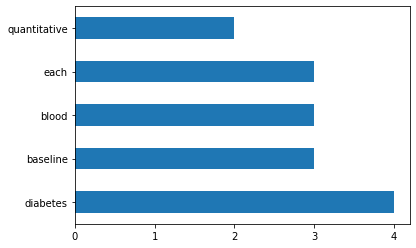

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_words = ['diabetes', 'dataset', 'diabetes', 'dataset', 'baseline', 'variables', 'body', 'mass', 'index', 'average', 'blood', 'pressure', 'blood', 'serum', 'measurements', 'were', 'obtained', 'each', 'diabetes', 'patients', 'well', 'response', 'interest', 'quantitative', 'measure', 'disease', 'progression', 'year', 'after', 'baseline', 'data', 'characteristics', 'number', 'instances', 'number', 'attributes', 'first', 'columns', 'numeric', 'predictive', 'values', 'target', 'column', 'quantitative', 'measure', 'disease', 'progression', 'year', 'after', 'baseline', 'attribute', 'information', 'body', 'mass', 'index', 'average', 'blood', 'pressure', 'note', 'each', 'these', 'feature', 'variables', 'have', 'been', 'mean', 'centered', 'scaled', 'standard', 'deviation', 'times', 'samples', 'squares', 'each', 'column', 'totals', 'source', 'https', 'stat', 'ncsu', 'boos', 'select', 'diabetes', 'html', 'more', 'information', 'bradley', 'efron', 'trevor', 'hastie', 'iain', 'johnstone', 'robert', 'tibshirani', 'least', 'angle', 'regression', 'annals', 'statistics', 'with', 'discussion', 'https', 'stanford', 'hastie', 'papers', 'lars', 'leastangle']

def count_words(word_list):
    # Count the words in the input list
    return {word: word_list.count(word) for word in word_list}

# Create the dictionary of words and word counts
word_count_dictionary = count_words(filtered_words)

(pd.DataFrame(word_count_dictionary.items())
 .sort_values(by=1, ascending=False)
 .head()
 .plot(x=0, kind="barh", xticks=range(5), legend=False)
 .set_ylabel("")
)
plt.show()

# It should be done using collections module

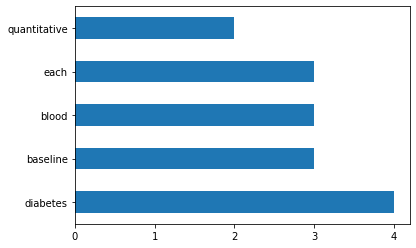

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

filtered_words = ['diabetes', 'dataset', 'diabetes', 'dataset', 'baseline', 'variables', 'body', 'mass', 'index', 'average', 'blood', 'pressure', 'blood', 'serum', 'measurements', 'were', 'obtained', 'each', 'diabetes', 'patients', 'well', 'response', 'interest', 'quantitative', 'measure', 'disease', 'progression', 'year', 'after', 'baseline', 'data', 'characteristics', 'number', 'instances', 'number', 'attributes', 'first', 'columns', 'numeric', 'predictive', 'values', 'target', 'column', 'quantitative', 'measure', 'disease', 'progression', 'year', 'after', 'baseline', 'attribute', 'information', 'body', 'mass', 'index', 'average', 'blood', 'pressure', 'note', 'each', 'these', 'feature', 'variables', 'have', 'been', 'mean', 'centered', 'scaled', 'standard', 'deviation', 'times', 'samples', 'squares', 'each', 'column', 'totals', 'source', 'https', 'stat', 'ncsu', 'boos', 'select', 'diabetes', 'html', 'more', 'information', 'bradley', 'efron', 'trevor', 'hastie', 'iain', 'johnstone', 'robert', 'tibshirani', 'least', 'angle', 'regression', 'annals', 'statistics', 'with', 'discussion', 'https', 'stanford', 'hastie', 'papers', 'lars', 'leastangle']

def count_words(word_list):
    # Count the words in the input list
    return Counter(word_list)

# Create the dictionary of words and word counts
word_count_dictionary = count_words(filtered_words)

(pd.DataFrame(word_count_dictionary.items())
 .sort_values(by=1, ascending=False)
 .head()
 .plot(x=0, kind="barh", xticks=range(5), legend=False)
 .set_ylabel("")
)
plt.show()

#   **Instance method**

We will work with a class called `ScikitData` that represents datasets from the popular Python machine learning library `scikit-learn`.



*   We will define an instance method called `pair_plot()` and add it to `ScikitData`.
*   `pair_plot()` instance method will plot dataset variables against each other using the `pairplot()` function, which has already been imported from the `seaborn` library.

## ต้องโหลดไฟล์ diabetes_data มาก่อน

### The class `ScikitData` below has been written on my own.  It is not a perfect substitute for the real things on DataCamp browser.



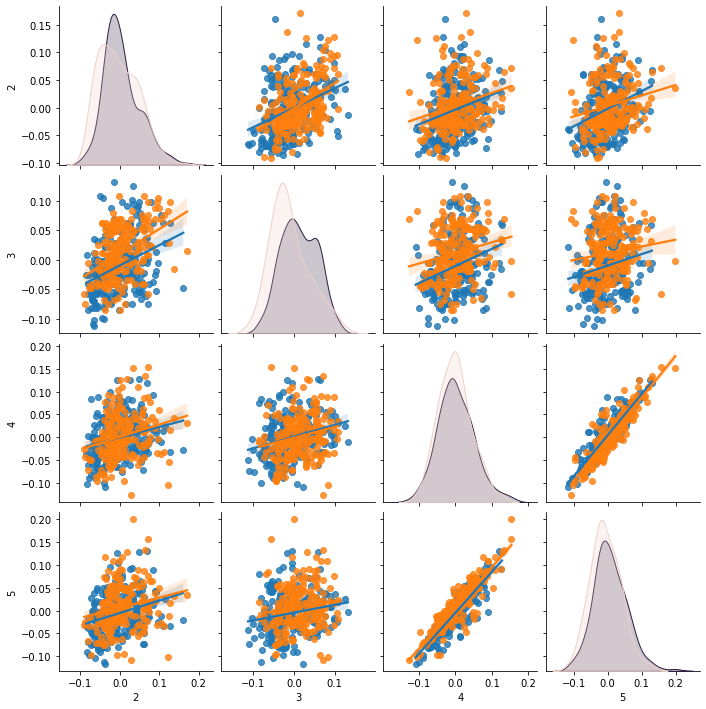

In [ ]:
from pathlib import Path
import pandas as pd
from seaborn import pairplot
from numpy import array
import matplotlib.pyplot as plt

class ScikitData:
    DATA = pd.read_csv("diabetes_data.csv")
    del DATA["Unnamed: 0"]
    DATA = DATA.values

    TARGET = pd.read_csv("diabetes_target.csv")
    del TARGET["Unnamed: 0"]
    TARGET = TARGET["0"]
    TARGET = TARGET.values

    def __init__(self, name):
        self.data = ScikitData.DATA
        self.descr = Path(name+".txt").read_text()
        self.feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] # จริงๆควรไปหามาจากแหล่งอื่น
        self.target = ScikitData.TARGET

    # Fill in the first parameter in the pair_plot() definition
    def pair_plot(self, vars=range(3), hue=None):
        return pairplot(pd.DataFrame(self.data), vars=vars, hue=hue, kind="reg")

    ScikitData.pair_plot = pair_plot # มีบรรทัดนี้มาทำไม เพราะถึงไม่มีก็รันได้ แต่ถ้ามีจะรันไม่ได้ถ้าหาก Restart Runtime

# Create the diabetes instance of the ScikitData class
diabetes = ScikitData("diabetes")
diabetes.pair_plot(vars=range(2, 6), hue=1)._legend.remove()
plt.show()

# Class method

If we have several datasets that we want to explore, it can be tedious to instantiate the `ScikitData` class repeatedly.

### To enable rapid instantiation of our ScikitData class, we will add a class method called `get_generator()`.

We will use `get_generator()` to create a generator named `dataset_generator` that will generate instances that represent the `diabetes` and `iris` datasets.



*   We will use a `for` loop and the `pair_plot()` instance method from the previous exercise to plot each dataset.



The details of how the `ScikitData` class works are hidden inside the module that contains the `ScikitData` class definition. We can use the `ScikitData` class to quickly obtain and explore scikit-learn datasets without looking at the `ScikitData` source code.



*   แต่ถ้าจะ replicate results ต้องมี source code โว้ย !



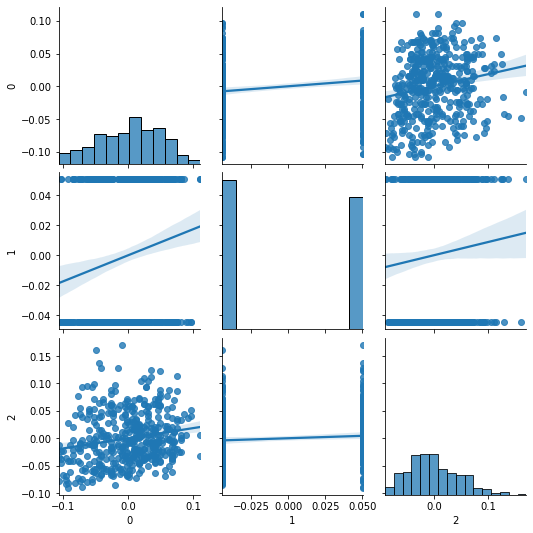

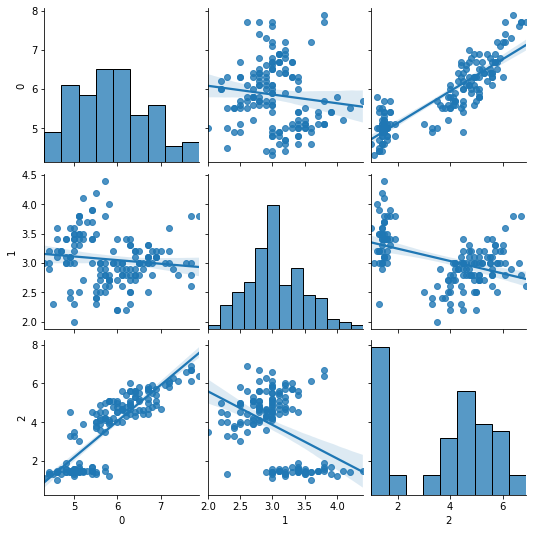

In [ ]:
from pathlib import Path
import pandas as pd
from seaborn import pairplot
from numpy import array
import matplotlib.pyplot as plt

class ScikitData:
    D_DATA = pd.read_csv("diabetes_data.csv")
    del D_DATA["Unnamed: 0"]
    D_DATA = D_DATA.values

    D_TARGET = pd.read_csv("diabetes_target.csv")
    del D_TARGET["Unnamed: 0"]
    D_TARGET = D_TARGET["0"] # ทำให้เป็น 1 dimension
    D_TARGET = D_TARGET.values

    I_DATA = pd.read_csv("iris_data.csv")
    del I_DATA["Unnamed: 0"]
    I_DATA = I_DATA.values

    I_TARGET = pd.read_csv("iris_target.csv")
    del I_TARGET["Unnamed: 0"]
    I_TARGET = I_TARGET["0"] # ทำให้เป็น 1 dimension
    I_TARGET = I_TARGET.values

    def __init__(self, name):
        if name == "diabetes":
            self.data = ScikitData.D_DATA
            self.descr = Path(name+".txt").read_text()
            self.feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] # จริงๆควรไปหามาจากแหล่งอื่น
            self.target = ScikitData.D_TARGET
        
        if name == "iris":
            self.data = ScikitData.I_DATA
            self.descr = Path(name+".txt").read_text()
            self.feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
            self.target = ScikitData.I_TARGET

    # Fill in the first parameter in the pair_plot() definition
    def pair_plot(self, vars=range(3), hue=None):
        return pairplot(pd.DataFrame(self.data), vars=vars, hue=hue, kind="reg")

    ScikitData.pair_plot = pair_plot

    # Fill in the decorator for the get_generator() definition
    @classmethod
    # Add the first parameter to the get_generator() definition
    def get_generator(cls, dataset_names):
        return map(cls, dataset_names)

    ScikitData.get_generator = get_generator
    
dataset_generator = ScikitData.get_generator(["diabetes", "iris"])
for dataset in dataset_generator:
    dataset.pair_plot()
    plt.show()

# `ScikitData.pair_plot = pair_plot`
# `ScikitData.get_generator = get_generator`

are strange.  They cause an error if the runtime is restarted.  Perhaps this is because the way it is written here.  In the exercises, the instance method and class method are defined at the outermost level.

In [ ]:
!pip install mypy pytest-mypy

     |████████████████████████████████| 21.6MB 2.0MB/s 
     |████████████████████████████████| 747kB 32.3MB/s 


# TextFile hints

`TextFile` class will have a `get_lines()` method that returns all of the lines from the text file used to instantiate the `TextFile` class.

The `TextFile` class definition is ready, but we want to add type hints, so that calling `help()` on the` TextFile `class will provide type annotation information to users.

In [ ]:
from typing import List
from pathlib import Path

class TextFile:
  	# Add type hints to TextFile"s __init__() method
    def __init__(self, name: str) -> None:
        self.text = Path(name).read_text()

	  # Type annotate TextFile"s get_lines() method
    def get_lines(self) -> List[str]:
        return self.text.split("\n")

help(TextFile)

Help on class TextFile in module __main__:

class TextFile(builtins.object)
 |  TextFile(name: str) -> None
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name: str) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_lines(self) -> List[str]
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## In this case, we can be certain that the result of calling `get_lines()` will be a list of strings. 

In [ ]:
# Example of TextFile class

d = TextFile("diabetes.txt")
display(d.text)
print("===================================================================================================================")
display(d.get_lines())

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

['.. _diabetes_dataset:',
 '',
 'Diabetes dataset',
 '----------------',
 '',
 'Ten baseline variables, age, sex, body mass index, average blood',
 'pressure, and six blood serum measurements were obtained for each of n =',
 '442 diabetes patients, as well as the response of interest, a',
 'quantitative measure of disease progression one year after baseline.',
 '',
 '**Data Set Characteristics:**',
 '',
 '  :Number of Instances: 442',
 '',
 '  :Number of Attributes: First 10 columns are numeric predictive values',
 '',
 '  :Target: Column 11 is a quantitative measure of disease progression one year after baseline',
 '',
 '  :Attribute Information:',
 '      - Age',
 '      - Sex',
 '      - Body mass index',
 '      - Average blood pressure',
 '      - S1',
 '      - S2',
 '      - S3',
 '      - S4',
 '      - S5',
 '      - S6',
 '',
 'Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of ea

# MatchFinder hints

*   We can introduce flexibility into type hints with the `Optional` (`None` and one of any other type) class.

*   Write a class `MatchFinder` that only accepts a list of strings as its strings argument and then store the input list in an instance variable called strings.

*   The `get_matches()` method returns a list of either

      *   every string in `strings` that contains the query argument or
      *   all strings in strings if the `match` argument is None.

In [ ]:
from typing import List, Optional
from pathlib import Path

class MatchFinder:
  	# Add type hints to __init__()'s strings argument
    def __init__(self, strings: List[str]) -> None:
        self.strings = strings

	# Type annotate get_matches()'s query argument
    def get_matches(self, query: Optional[str] = None) -> List[str]:
        return [s for s in self.strings if query in s] if query else self.strings

help(MatchFinder)

Help on class MatchFinder in module __main__:

class MatchFinder(builtins.object)
 |  MatchFinder(strings: List[str]) -> None
 |  
 |  Methods defined here:
 |  
 |  __init__(self, strings: List[str]) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_matches(self, query: Union[str, NoneType] = None) -> List[str]
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



Type hints help us to understand important aspects of how functions and methods work, without having to look at the source code in modules.

In [ ]:
# ตัวอย่าง class MatchFinder

m1 = MatchFinder("diabetes.txt")
m2 = MatchFinder(["iris.txt", "diabetes.txt"])
display(m1.strings)
display(m2.strings)
display(m2.get_matches("ddd"))
display(m2.get_matches("ir"))
display(m2.get_matches("dia"))

'diabetes.txt'

['iris.txt', 'diabetes.txt']

[]

['iris.txt']

['diabetes.txt']

# Get matches docstring



*   The doctest examples will show how to use `get_matches()` to find a matching character in a list of strings.



In [ ]:
from typing import List

def get_matches(word_list: List[str], query:str) -> List[str]:
    ("Find lines containing the query string.\nExamples:\n\t"
     # Complete the docstring example below
     ">>> get_matches(['a', 'list', 'of', 'words'], 's')\n\t"
     # Fill in the expected result of the function call
     "['list', 'words']")
    return [line for line in word_list if query in line]

help(get_matches)

Help on function get_matches in module __main__:

get_matches(word_list: List[str], query: str) -> List[str]
    Find lines containing the query string.
    Examples:
            >>> get_matches(['a', 'list', 'of', 'words'], 's')
            ['list', 'words']



# Obtain words docstring

In the `obtain_words()` function's docstring, we will obtain the title of a poem about Python.

Later, we can use `doctest` to compare the actual and expected result.

In [ ]:
from typing import List

def obtain_words(string: str) -> List[str]:
    ("Get the top words in a word list.\nExamples:\n\t"
     ">>> from this import s\n\t>>> from codecs import decode\n\t"
     # Use obtain_words() in the docstring example below
     ">>> obtain_words(decode(s, encoding='rot13'))[:4]\n\t"
     # Fill in the expected result of the function call
     "['The', 'Zen', 'of', 'Python']") 
    return ''.join(char if char.isalpha() else ' ' for char in string).split()
  
help(obtain_words)

Help on function obtain_words in module __main__:

obtain_words(string: str) -> List[str]
    Get the top words in a word list.
    Examples:
            >>> from this import s
            >>> from codecs import decode
            >>> obtain_words(decode(s, encoding='rot13'))[:4]
            ['The', 'Zen', 'of', 'Python']



# **Track notebooks changes**

Below is a notebook called "old", which has a single empty code cell.

In [6]:
%%file old.ipynb
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "c4396ead",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "690bf982",
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.7.3"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}


Writing old.ipynb


The notebook below is named "new" and has an empty code cell followed by a `markdown` cell with the word "Hi!".

In [8]:
%%file new.ipynb
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "c4396ead",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "markdown",
   "id": "adecc2bd",
   "metadata": {},
   "source": [
    "Hi!"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.7.3"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}


Overwriting new.ipynb


If we use the `diff` shell command to compare the "old" and "new" notebooks, we will see the changes to the underlying `JSON` structure of the notebooks.

In [1]:
!diff -c old.ipynb new.ipynb

*** old.ipynb	2021-06-09 02:02:42.858506888 +0000
--- new.ipynb	2021-06-09 02:03:15.696474590 +0000
***************
*** 9,20 ****
     "source": []
    },
    {
!    "cell_type": "code",
!    "execution_count": null,
!    "id": "690bf982",
     "metadata": {},
!    "outputs": [],
!    "source": []
    }
   ],
   "metadata": {
--- 9,20 ----
     "source": []
    },
    {
!    "cell_type": "markdown",
!    "id": "adecc2bd",
     "metadata": {},
!    "source": [
!     "Hi!"
!    ]
    }
   ],
   "metadata": {


In [3]:
!pip install nbdime

     |████████████████████████████████| 5.1MB 12.1MB/s 
     |████████████████████████████████| 389kB 51.5MB/s 
     |████████████████████████████████| 3.1MB 39.0MB/s 
     |████████████████████████████████| 174kB 59.8MB/s 
     |████████████████████████████████| 122kB 64.2MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
ERROR: jupyter-server 1.8.0 has requirement tornado>=6.1.0, but you'll have tornado 5.1.1 which is incompatible.
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5


#   **Nbdiff**

The `nbdime` library includes an `nbdiff` shell command that parses the `JSON` structure of Jupyter notebooks to provide a much more readable comparison of "old" and "new".

In [2]:
!nbdiff old.ipynb new.ipynb

nbdiff old.ipynb new.ipynb
--- old.ipynb  2021-06-09 02:02:42.858507
+++ new.ipynb  2021-06-09 02:03:15.696475
## inserted before /cells/1:
+  markdown cell:
+    source:
+      Hi!

## deleted /cells/1:
-  code cell:



# **Code Cells**

The `nbformat.v4` module includes the `new_notebook()` function, which allows us to create notebook objects.  Below, we create a notebook and add a code cell to the notebook's "`cells`" attribute with the `new_code_cell()` function.

*   "`execution_count`" key that tracks how many times the cell was executed. 
*   "`source`" string contains the code we passed to `new_code_cell`(). 
*   "`outputs`" list stores plots and other results.

In [3]:
from nbformat.v4 import new_notebook, new_code_cell
nb = new_notebook()
nb.cells.append(new_code_cell('1+1'))
nb.cells

[{'cell_type': 'code',
  'execution_count': None,
  'id': '42913268',
  'metadata': {},
  'outputs': [],
  'source': '1+1'}]

# **Markdown cells**

*  Use the `new_markdown_cell()` function to add a markdown cell
*  The markdown cell contains the text we passed to `new_markdown_cell()` in its "source" string 
*  Save the notebook to a file with the `nbformat.write()` function.

In [5]:
import nbformat
from nbformat.v4 import new_markdown_cell
nb.cells.append(new_markdown_cell('Hi'))
len(nb.cells)
print(nb.cells[1])
nbformat.write(nb, "mynotebook.ipynb")

{'id': 'e340991b', 'cell_type': 'markdown', 'source': 'Hi', 'metadata': {}}


# **Nbconvert exporters**

*  Use `get_exporter()` function.
*  Use `from_filename()` method that accepts notebook `filenames` and returns a tuple
*  The first item in the tuple is the contents of a converted file, which we can save using `pathlib`. 

In [9]:
from nbconvert.exporters import get_exporter
from pathlib import Path

html_exporter = get_exporter('html')()
contents = html_exporter.from_filename('mynotebook.ipynb')[0]
Path('myreport.html').write_text(contents)

272195

ตัวเลขที่เป็นผลลัพธ์ ไม่ต้องสนใจ แต่ผลลัพธ์ที่ออกมา คือ notebook ในรูป `html` ซึ่งจะไปแตะต้องหรือแก้ไขไม่ได้ (เสมือนเซฟเป็นไฟล์ภาพมา)

# **Build notebooks**

The first function we will write is called `nbuild()`.

`nbuild()` will



*   Create a new notebook with the `new_notebook()` function from the `v4` module of `nbformat`.
*   Read the file contents from a list of source files with the `read_file()` function that we have used in previous exercises.
*   Pass the file contents to the `new_code_cell()` or `new_markdown_cell()` functions from the `v4` module of `nbformat`.
*   Assign a list of the resulting cells to the `'cells'` key in the new notebook.
*   Return the `notebook` instance.

With `nbuild()`, we will be able to create Jupyter notebooks




In [5]:
import nbformat
from pprint import pprint
from pathlib import Path
from typing import List
from nbformat.v4 import new_code_cell, new_markdown_cell, new_notebook

def nbuild(filenames: List[str]) -> nbformat.notebooknode.NotebookNode:
    """Create a Jupyter notebook from text files and Python scripts."""
    nb = new_notebook()
    
    # Create new code cells from files that end in .py or new markdown cells from all other files.
    nb.cells = [new_code_cell(Path(name).read_text()) if name.endswith(".py") else new_markdown_cell(Path(name).read_text()) for name in filenames]
    return nb

# You must have these files in your present working directory.    
pprint(nbuild(["intro.md", "plot.py", "discussion.md"]))
nb = nbuild(["intro.md", "plot.py", "discussion.md"])
nbformat.write(nb, "mynotebook.ipynb")

{'cells': [{'cell_type': 'markdown',
            'id': '3c0ac4a6',
            'metadata': {},
            'source': '# Introduction\n'
                      "Here's a nice plot made with the matplotlib plotting "
                      'library.'},
           {'cell_type': 'code',
            'execution_count': None,
            'id': 'c6faa9ab',
            'metadata': {},
            'outputs': [],
            'source': 'import numpy as np\n'
                      'import matplotlib.pyplot as plt\n'
                      'N = 50\n'
                      'x = np.random.rand(N)\n'
                      'y = np.random.rand(N)\n'
                      'colors = np.random.rand(N)\n'
                      'area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 '
                      'point radii\n'
                      'plt.scatter(x, y, s=area, c=colors, alpha=0.5)\n'
                      'plt.show()'},
           {'cell_type': 'markdown',
            'id': '3c613386',
            'meta

Next, we will save the output of `nbuild()` as a notebook and write a function that will allow us to convert notebooks to (almost) any format!

# **Convert notebooks**

`nbconvert` is very flexible and includes exporter classes that can convert notebooks into many formats, including: 

   *    `asciidoc` 
   *    `custom` 
   *    `html`  
   *    `latex`
   *    `markdown`
   *    `notebook`
   *    `pdf`
   *    `python`
   *    `rst`
   *    `script`
   *    `slides`

We'll write a single function, called `nbconv()`, that can export to any of these formats.

To do this, we'll use the `get_exporter()` function from the `exporters` module of `nbconvert`.

After instantiating an exporter, we'll use its `from_filename()` method to obtain the contents of the converted file that will be returned by `nbconv()`

The `from_filename()` method also produces a dictionary of metadata that we will not use in this exercise.

Unlike `nbuild()`, nbconv() will return a string, rather than a `NotebookNode` object.

In [6]:
import nbformat
from pprint import pprint
from pathlib import Path
from typing import List
from nbformat.v4 import new_code_cell, new_markdown_cell, new_notebook
from nbconvert.exporters import get_exporter

def nbconv(nb_name: str, exporter: str = "script") -> str:
    """Convert a notebook into various formats using different exporters."""
    # Instantiate the specified exporter class
    exp = get_exporter(exporter)()
    # Return the converted file"s contents string 
    return exp.from_filename(nb_name)[0]
    
pprint(nbconv(nb_name="mynotebook.ipynb", exporter="html"))
contents = nbconv(nb_name="mynotebook.ipynb", exporter="html")
Path('myreport.html').write_text(contents)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
 '  content: "\\f1c2";\n'
 '}\n'
 '.fa-file-excel-o:before {\n'
 '  content: "\\f1c3";\n'
 '}\n'
 '.fa-file-powerpoint-o:before {\n'
 '  content: "\\f1c4";\n'
 '}\n'
 '.fa-file-photo-o:before,\n'
 '.fa-file-picture-o:before,\n'
 '.fa-file-image-o:before {\n'
 '  content: "\\f1c5";\n'
 '}\n'
 '.fa-file-zip-o:before,\n'
 '.fa-file-archive-o:before {\n'
 '  content: "\\f1c6";\n'
 '}\n'
 '.fa-file-sound-o:before,\n'
 '.fa-file-audio-o:before {\n'
 '  content: "\\f1c7";\n'
 '}\n'
 '.fa-file-movie-o:before,\n'
 '.fa-file-video-o:before {\n'
 '  content: "\\f1c8";\n'
 '}\n'
 '.fa-file-code-o:before {\n'
 '  content: "\\f1c9";\n'
 '}\n'
 '.fa-vine:before {\n'
 '  content: "\\f1ca";\n'
 '}\n'
 '.fa-codepen:before {\n'
 '  content: "\\f1cb";\n'
 '}\n'
 '.fa-jsfiddle:before {\n'
 '  content: "\\f1cc";\n'
 '}\n'
 '.fa-life-bouy:before,\n'
 '.fa-life-buoy:before,\n'
 '.fa-life-saver:before,\n'
 '.fa-support:before,\n'
 '.fa-life-ring:before {

274666

We could just as easily create a PDF report by passing 'pdf' to `nbconv()` as its exporter argument.

# Parametrize Pytests

The arguments we will pass to parametrize are

*   a name for the list of arguments and
*   the list of arguments itself

In this exercise, we will define a `test_nbuild()` function to pass three different file types to the `nbuild()` function and confirm that the output notebook contains the input file in its first cell.

We will use a custom function called `show_test_output()` to see the test output below.

In [ ]:
def show_test_output(func):
    !python -m pytest  test_nbuild.py

ฟังก์ชัน `show_test_output` เขียนขึ้นเอง ไม่รู้จริงๆมันเป็นยังไง แต่ไม่ใช่อย่างนี้แน่นอน

### ประเด็นสำคัญคือ 


*   ต้องใช้คำว่า `!python -m` นำหน้า เพราะ `pytest` ที่รันบน colab ส่วนใหญ่ใช้ `Python 2.7` ซึ่งไม่รู้จักการเขียน Type Hints
*   `test_nbuild.py` จะเขียนเป็น `"test_nbuild.py"` ก็ได้ แต่เพราะมันเป็น คำสั่งบน Shell ทำให้ไม่สามารถใช้ `func.__name__+".py"` แทนได้ หรือจะเขียน `filename = func.__name__+".py"` แล้วใช้ `filename` แทนก็ไม่ได้เช่นกัน



In [ ]:
#%%file test_nbuild.py
import nbformat
import pytest
from pprint import pprint
from pathlib import Path
from typing import List
from nbformat.v4 import new_code_cell, new_markdown_cell, new_notebook

def nbuild(filenames:List[str]) -> nbformat.notebooknode.NotebookNode:
    """Create a Jupyter notebook from text files and Python scripts."""
    nb = new_notebook()
    
    # Create new code cells from files that end in .py or new markdown cells from all other files.
    nb.cells = [new_code_cell(Path(name).read_text()) if name.endswith(".py") else new_markdown_cell(Path(name).read_text()) for name in filenames]
    return nb

# Fill in the decorator for the test_nbuild() function 
@pytest.mark.parametrize("inputs", ["intro.md", "plot.py", "discussion.md"])
# Pass the argument set to the test_nbuild() function
def test_nbuild(inputs):
    assert nbuild([inputs]).cells[0].source == Path(inputs).read_text()

show_test_output(test_nbuild)



============================= test session starts ==============================
platform linux -- Python 3.7.10, pytest-3.6.4, py-1.10.0, pluggy-0.7.1
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 3 items                                                              

test_nbuild.py ...                                                       [100%]

=========================== 3 passed in 0.08 seconds ===========================


# Raises Error using Pytests

We will define a test function called `test_nbconv()` that will use the


*   `@parametrize` decorator to pass three unsupported arguments to our `nbconv()` function
*   `raises()` function to make sure that passing each incorrect argument to `nbconv()` results in a `ValueError`



In [ ]:
import nbformat
import pytest
from pprint import pprint
from pathlib import Path
from typing import List
from nbformat.v4 import new_code_cell, new_markdown_cell, new_notebook
from nbconvert.exporters import get_exporter

def nbconv(nb_name: str, exporter: str = "script") -> str:
    """Convert a notebook into various formats using different exporters."""
    # Instantiate the specified exporter class
    exp = get_exporter(exporter)()
    # Return the converted file"s contents string 
    return exp.from_filename(nb_name)[0]

@pytest.mark.parametrize("not_exporters", ["htm", "ipython", "markup"])
# Pass the argument set to the test_nbconv() function
def test_nbconv(not_exporters):
     # Use pytest to confirm that a ValueError is raised
    with pytest.raises(ValueError):
        nbconv(nb_name="mynotebook.ipynb", exporter=not_exporters)

!python -m pytest test_nbconv.py

============================= test session starts ==============================
platform linux -- Python 3.7.10, pytest-3.6.4, py-1.10.0, pluggy-0.7.1
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 3 items                                                              

test_nbconv.py ...                                                       [100%]

=========================== 3 passed in 0.42 seconds ===========================


# **Command-line interfaces**

**Command-line interfaces (CLIs)** allow us to pass **shell arguments** to Python scripts.

For example

```
!python fit_model.py --alpha 0.2
```
# **Argparse**

  *   Argparse builds CLIs with the methods and attributes of its "`ArgumentParser`" class. 
  *   After we instantiate the `ArgumentParser` class, we set up a CLI with the `add_argument`() method
  *   Obtain a `Namespace` object using the `parse_args()` method. 

Individual arguments are accessible as attributes of the `Namespace` object.

Note: โค้ดด้านล่างนี้ ถ้าไม่ใส่ `nargs="?"` จะ รันตรงๆไม่ได้ ต้องไปเขียนใส่ script.py ไฟล์ แล้วรันโดยใช้ Shell Command



In [5]:
import argparse
import sys
sys.argv=['']
del sys
parser = argparse.ArgumentParser()
parser.add_argument("ARGUMENT_NAME",nargs="?")
namespace = parser.parse_args()  # นี่คือ namespace object
print(namespace)

parser.add_argument("ARGUMENT_NAME",nargs="?", default="ABC")
namespace = parser.parse_args()  # นี่คือ namespace object
print(namespace)

Namespace(ARGUMENT_NAME=None)
Namespace(ARGUMENT_NAME='ABC')


In the file `get_namespace.py`, we define a function called `get_namespace()` that 

  *   instantiates the "`ArgumentParser`" class
  *   uses the add_argument() method to add an argument called "`format`"
  *   returns a `Namespace` object with the parse_args() method. 

In [20]:
%%file get_namespace.py
import argparse as ap
def get_namespace() -> ap.Namespace:
    parser = ap.ArgumentParser()
    parser.add_argument('format')
    return parser.parse_args()

Writing get_namespace.py




*   Below, import the `get_namespace()` function into a script called "`now.py`"
*   Pass the "`format`" shell argument to the `strftime()` method, which converts `datetime` objects into strings. 



In [16]:
%%file now.py
import pytz
from datetime import datetime
from get_namespace import get_namespace
if __name__ == '__main__':
    tz = pytz.timezone('Asia/Bangkok')
    namespace = get_namespace()
    print(datetime.now(tz).strftime(namespace.format))

Overwriting now.py


In [32]:
!python now.py %Y/%B/%d_%H:%M:%S

2021/June/08_18:56:56


#   **Docopt**

`Docopt` designs and documents CLIs with file docstrings by passing the `__doc__` variable to the `docopt()` function

"""Pass a single argument to FILENAME.
Usage: `FILENAME.py` `ARGUMENT_NAME`"""

### `ARGUMENT_NAME` must be upper case !! or surrounded by less than (`<`) and greater than (`>`) signs .

The `get_arg_dict()` function below passes `__doc__` to the `docopt()` function and returns a dictionary.

In [20]:
%%file get_arg_dict.py
"""Get the current date or time.
Usage: now.py FORMAT"""
from typing import Dict
import docopt
def get_arg_dict() -> Dict[str, str]:
    return docopt.docopt(__doc__)
    # We can obtain an argument dictionary that stores shell arguments as values.

Writing get_arg_dict.py


After importing `get_arg_dict()` into "`now2.py`", we can obtain the argument dictionary and supply the `FORMAT` argument to `strftime()`. 

In [33]:
%%file now2.py
import pytz
from datetime import datetime
from get_arg_dict import get_arg_dict
if __name__ == '__main__':
    tz = pytz.timezone('Asia/Bangkok')
    arg_dict = get_arg_dict()
    print(datetime.now(tz).strftime(arg_dict['FORMAT']))

Writing now2.py


In [34]:
!python now2.py %Y/%B/%d_%H:%M:%S

2021/June/08_18:59:08


# **Argparse nbuild()**

We will use the standard library `argparse` module to make a general command-line interface (`CLI`) function called `argparse_cli()` and apply this function to the `nbuild()` function

We want `argparse_cli()` to be able to handle an indeterminate number of shell arguments. To do this with `argparse`, we need to pass `nargs='*'` to the `add_argument()` method of an instance of the `ArgumentParser` class.

We will use our CLI to pass shell arguments to `nbuild()`.

##  There is an unknown exit error which can be fixed by typing these lines.  No idea.
```
import sys
sys.argv=['']
del sys
```



In [1]:
import nbformat
import argparse
from pprint import pprint
from pathlib import Path
from typing import List, Callable
from nbformat.v4 import new_code_cell, new_markdown_cell, new_notebook

# Unknown exit error which can be fixed by typing these lines.  No idea.
import sys
sys.argv=['']
del sys

def nbuild(filenames:List[str]) -> nbformat.notebooknode.NotebookNode:
    """Create a Jupyter notebook from text files and Python scripts."""
    nb = new_notebook()
    
    # Create new code cells from files that end in .py or new markdown cells from all other files.
    nb.cells = [new_code_cell(Path(name).read_text()) if name.endswith(".py") else new_markdown_cell(Path(name).read_text()) for name in filenames]
    return nb

def argparse_cli(func: Callable) -> None:
    # Instantiate the parser object
    parser = argparse.ArgumentParser()
    # Add an argument called in_files to the parser object
    parser.add_argument("in_files", nargs="*")
    args = parser.parse_args()
    print(func(args.in_files))

if __name__ == "__main__":
    argparse_cli(nbuild)

{'nbformat': 4, 'nbformat_minor': 5, 'metadata': {}, 'cells': []}


# **Docopt nbuild()**

The docstring in our `docopt_cli.py` file is only one line, but it includes all the details we need to pass a list of shell arguments to any function.

More specifically, the docstring determines that our `IN_FILES` variable is


*   optional and
*   represents a list of arguments

In `docopt` docstrings, optional arguments are wrapped in square brackets (`[]`), while lists of arguments are followed by ellipses (`...`).





In [ ]:
import nbformat
from docopt import docopt
from pprint import pprint
from pathlib import Path
from typing import List, Callable
from nbformat.v4 import new_code_cell, new_markdown_cell, new_notebook

# Unknown exit error which can be fixed by typing these lines.  No idea.
import sys
sys.argv=['']
del sys

def nbuild(filenames:List[str]) -> nbformat.notebooknode.NotebookNode:
    """Create a Jupyter notebook from text files and Python scripts."""
    nb = new_notebook()
    
    # Create new code cells from files that end in .py or new markdown cells from all other files.
    nb.cells = [new_code_cell(Path(name).read_text()) if name.endswith(".py") else new_markdown_cell(Path(name).read_text()) for name in filenames]
    return nb

"""Usage: docopt_cli.py [IN_FILES...]"""

def docopt_cli(func: Callable) -> None:
    # Assign the shell arguments to "args"
    args = docopt(__doc__)
    print(func(args["IN_FILES"]))

if __name__ == "__main__":
    docopt_cli(nbuild)

{'nbformat': 4, 'nbformat_minor': 5, 'metadata': {}, 'cells': []}


`{'nbformat': 4, 'nbformat_minor': 5, 'metadata': {}, 'cells': []}`

`{'nbformat': 4, 'nbformat_minor': 5, 'metadata': {}, 'cells': []}`

# มันมาได้ไง มาจากไหน ? ในเมื่อ `nbuild()` คือการสร้าง .ipynb ขึ้นมาใหม่ แล้วไอ้ `in_files` หรือ `IN_FILES` นี่มันอะไร ทำไมถึงให้ผลลัพธ์แบบนี้ ไม่เข้าใจเลย

# **Git init**

Git records and manages modifications made to projects to avoid lost work or unwanted changes.

The basic git workflow involves 

  *  making changes in the working directory 
  *  adding changes to the index
  *  committing changes to version control history.

To create a new repository, we will import `GitPython` and call the `Repo` class `init()` method in a script called `init.py. `


In [16]:
!mkdir "/content/Git_Prac"

In [17]:
import os
os.chdir("/content/Git_Prac")

In [18]:
%%file init.py 
import git
print(git.Repo.init())

Writing init.py


Running `init.py`, or the "`git init`" shell command will create the `.git/` directory.

In [19]:
!git init

Initialized empty Git repository in /content/Git_Prac/.git/


In [10]:
!python init.py

<git.repo.base.Repo '/content/Git_Practice/.git'>


Since the repository is already initialized, we can instantiate the `Repo` class without calling `init()`. The Repo instance has an "`untracked_files`" attribute.

In [12]:
import git
repo = git.Repo()
repo.untracked_files

['init.py']

#  **Add untracked files**

To add all untracked files to the index, 

   *  create a variable called `add_list` 
   *  pass it to the `add()` method. 
   
After adding untracked files to the index, the `untracked_files` attribute will be an empty.

In [13]:
import git
repo = git.Repo() 
add_list = repo.untracked_files
display(repo.untracked_files)
if add_list: 
    repo.index.add(add_list)
display(repo.untracked_files)

['init.py']

[]

#  **Commit new files**

The last step is to pass the commit message to the `commit()` method and access the message attribute to print out the commit message.

In [20]:
%%file commit.py
import git
repo = git.Repo() 
add_list = repo.untracked_files
if add_list: repo.index.add(add_list) 
new =f"New files:{', '.join(add_list)}"
print(repo.index.commit(new).message)

Writing commit.py


When we run the code shown here in a script called "`commit.py`", the commit message output tells us that this commit added 2 new files to version control history.

In [21]:
!python commit.py

New files:commit.py, init.py


#  Track Modified Files

*   Use the `diff()` method. 
*   Passing `None` to the `diff()` method compares the index with the current state of the working directory.

In [22]:
import git
repo = git.Repo() 
diff = repo.index.diff(None)
diff

[]

Modify the `commit.py` file to see how `commit` works.  We can include only modified files in the diff variable by 


*  Passing "`M`" to the `iter_change_type()` method. The "`M`" stands for Modified. 
*  Then use a list comprehension to create a list of modified files.
*  Pass this list to the `add()` method and create a commit message for the `commit()` method.

The `commit.py` script will now commit all changes made to tracked files.

In [23]:
%%file commit.py
import git
repo = git.Repo() 
diff = repo.index.diff(None).iter_change_type('M') 
edit_list = [file.a_path for file in diff]
if edit_list: 
    repo.index.add(edit_list) 
    modified = f"Modified files:{', '.join(edit_list)}."
    print(repo.index.commit(modified).message)

Overwriting commit.py


The first time we run "`commit.py`", we commit the changes we made to `commit.py`. 

In [24]:
!python commit.py

Modified files:commit.py.


The second time we run "`commit.py`", nothing happens, because all modifications have already been committed. 

In [25]:
!python commit.py

# **Commit added files**

`GitPython` gives us building blocks that we can use to build Python scripts that make our use of version control faster, easier, and more efficient.

Version controlled projects usually start with initializing or cloning repositories. After a repository is set up, the standard cycle of commands is `add` and `commit` changes.

In the code below, we will focus on the first two steps: `adding changes` to the index and `committing` them to version control history.

With `GitPython`, we can initialize a new repository and instantiate the `Repo` class in one line of code.

We can then check for 

*  untracked files, 
*  add files to the index, 
*  commit changes, 
*  and list all of the newly tracked files.

# ไม่รู้ว่าทำไม `!pip install GitPython gitdb2` ใช้ไม่ได้ และไม่รู้ทำไม `!pip install gcg` กลับทำให้ใช้คำสั่ง `import git` ได้ หรือต้องลงทั้ง `GitPython` และ `gcg` ?

In [3]:
!pip install gcg

  Using cached https://files.pythonhosted.org/packages/27/da/6f6224fdfc47dab57881fe20c0d1bc3122be290198ba0bf26a953a045d92/GitPython-3.1.17-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ea/e8/f414d1a4f0bbc668ed441f74f44c116d9816833a48bf81d22b697090dba8/gitdb-4.0.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/68/ee/d540eb5e5996eb81c26ceffac6ee49041d473bc5125f2aa995cf51ec1cf1/smmap-4.0.0-py2.py3-none-any.whl
  Created wheel for gcg: filename=gcg-0.2.0-cp37-none-any.whl size=10875 sha256=78f0ec2c27a3886d8a836008e7cd01a27775319be18322d7024ed27e3c001e8b
  Stored in directory: /root/.cache/pip/wheels/79/3a/36/e0a13a774aa7cfe7aed696761b071c393fa0634c47e9caa0aa
Successfully built gcg


In [4]:
import os
os.chdir("/content/sample_data")
import git
# Initialize a new repo in the current folder
repo = git.Repo.init()

# Obtain a list of untracked files
untracked = repo.untracked_files

# Add all untracked files to the index
repo.index.add(untracked)

# Commit newly added files to version control history
repo.index.commit(f"Added {', '.join(untracked)}")
print(repo.head.commit.message)

Added README.md, anscombe.json, california_housing_test.csv, california_housing_train.csv, mnist_test.csv, mnist_train_small.csv


# **Commit modified files**

In the cell above, we have made some changes and now we want to get a list of the files that have changed.

We will include the list of changed files in our next commit message.

A major advantage of `GitPython` is that it allows us to programmatically access information on the status of our repositories.

Here, we will use the `diff()` method to obtain a list of files with changes since the latest commit.

Our code should work regardless of how many or which files have been modified.

For an example of how `GitPython` can be applied in the real world, take a look at the `Gitone` Python package.

In [ ]:
import git

changed_files = [file.b_path
                 # Iterate over items in the diff object
                 for file in repo.index.diff(None)
                 # Include only modified files
                 .iter_change_type("M")]

repo.index.add(changed_files)
repo.index.commit(f"Modified {', '.join(changed_files)}")
for number, commit in enumerate(repo.iter_commits()):
    print(number, commit.message)

0 Modified 
1 Added README.md, anscombe.json, california_housing_test.csv, california_housing_train.csv, mnist_test.csv, mnist_train_small.csv


#      **Virtual environments**

***Virtual environments*** are directories that contain separate `Python` installations.

In [28]:
import os
!mkdir venv_practice
os.chdir("/content/venv_practice")

#   **Install dependencies**

We use `venv` to create a virtual environment in the `.venv` folder and then activate it with the `source` command.

In [8]:
%%file /content/venv_practice/requirements.txt

matplotlib
numpy >= 1.18.4
pycodestyle>=2.4.0

Overwriting /content/venv_practice/requirements.txt


In [9]:
!python -m venv .venv
!source .venv/bin/activate
!pip install --requirement requirements.txt

Error: Command '['/content/venv_practice/.venv/bin/python3', '-Im', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: .venv/bin/activate: No such file or directory
     |████████████████████████████████| 15.3MB 280kB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4


# **List installed packages**
We will create a `venv` virtual environment and then make sure we are using a relatively recent of version `pandas`.

We will use the `pip list` command to pick out `pandas` from a list of all the packages available in our virtual environment.

#  **Subprocess module**

We can run shell commands in a Python environment with the standard library `subprocess` module. The `run()` function returns a `CompletedProcess` instance. 

To access the output, we need set the `stdout=-1`.  

The output is then stored in the `stdout` instance attribute as a "bytes" object. 

To print the result as a string, we use the `decode()` method.

Below, we use `pip` to list installed packages.

### ทำไปทำไม ในเมื่อเราสามารถรัน shell command ด้วยเครื่องหมาย `!` ได้ ??

In [12]:
import venv
import subprocess

# Create an virtual environment
# venv.create(".venv")

# Run pip list and obtain a CompletedProcess instance
# cp = subprocess.run([".venv/bin/python", "-m", "pip", "list"], stdout=-1)  #ใช้ไม่ได้โว้ย ไม่รู้ทำไม
cp = subprocess.run(["python", "-m", "pip", "list"], stdout=-1)
for line in cp.stdout.decode().split("\n"):
    if "pandas" in line:
        print(line)

pandas                        1.1.5              
pandas-datareader             0.9.0              
pandas-gbq                    0.13.3             
pandas-profiling              1.4.1              
sklearn-pandas                1.8.0              


# **Show package information**

We will use the `pip install` command to install a local package called `aadvark`.

The `requirements.txt` file in the current working directory is already set up to install any local packages that can be found.

To confirm that the installation worked, and the `pip show `command to access information on the `aadvark` package.

The code below can be used as part of a script to set up a virtual environment and install local packages in any directory.



*   For the code below to work you must have two necessary files in your pwd: `setup.py` and `requirements.txt`.


In [ ]:
from subprocess import run

print(run(
    # Install project dependencies
    #[".venv/bin/python", "-m", "pip", "install", "-r", "requirements.txt"],
    ["python", "-m", "pip", "install", "-r", "requirements.txt"],
    stdout=-1
).stdout.decode())

print(run(
    # Show information on the aardvark package
    # ".venv/bin/python", "-m", "pip", "show", "aardvark"], 
    ["python", "-m", "pip", "show", "aardvark"], stdout=-1
).stdout.decode())

Processing /content
  Created wheel for aardvark: filename=aardvark-0.0.1-cp37-none-any.whl size=1061 sha256=0e8086ffe2bba34a9e17953c587b38febd16b9add66ce3aac065cd0380fc6d72
  Stored in directory: /tmp/pip-ephem-wheel-cache-p9mj7sv3/wheels/79/e4/46/b543fbe2080c77d83abeb745479b4d9ea39d74821f3db752e7
Successfully built aardvark
  Found existing installation: aardvark 0.0.1
    Uninstalling aardvark-0.0.1:
      Successfully uninstalled aardvark-0.0.1

Name: aardvark
Version: 0.0.1
Summary: A package that is always at the top of every list!
Home-page: aard.vark.com
Author: Martin Skarzynski
Author-email: martin@mail.com
License: mit
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: 



Instead of installing libraries one by one, we can install all dependencies from a `requirements.txt` file by running `Make` or a `Python` script!

### For some unknown reasons to me, the command in `subprocess.run` must be `"python"` instead of `".venv/bin/python"`, at least while it runs on Google Colab.

# **Pickle dataframes**

*   We will create a Pandas dataframe from the diabetes dataset,
*   add column names based on the [dataset documentation](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html), and then
*   pickle and unpickle the dataframe using Pandas methods.

Finally, we will create a Pandas scatterplot to look at the relationship between a diabetes dataset predictor and the target variable.

### โจทย์ให้ `diabetes` ซึ่งเป็น `ScikitData object `ที่เขียนไว้แล้วในโค้ดด้านบน แต่เราต้องเอามาเขียนใหม่

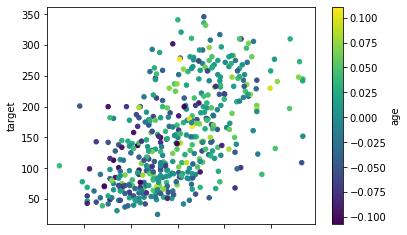

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from seaborn import pairplot
from numpy import array

class ScikitData:
    DATA = pd.read_csv("diabetes_data.csv")
    del DATA["Unnamed: 0"]
    DATA = DATA.values

    TARGET = pd.read_csv("diabetes_target.csv")
    del TARGET["Unnamed: 0"]
    TARGET = TARGET["0"]
    TARGET = TARGET.values

    def __init__(self, name):
        self.data = ScikitData.DATA
        self.descr = Path(name+".txt").read_text()
        self.feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] # จริงๆควรไปหามาจากแหล่งอื่น
        self.target = ScikitData.TARGET

    # Fill in the first parameter in the pair_plot() definition
    def pair_plot(self, vars=range(3), hue=None):
        return pairplot(pd.DataFrame(self.data), vars=vars, hue=hue, kind="reg")
       
        
diabetes = ScikitData("diabetes")

pd.DataFrame(
    np.c_[(diabetes.data, diabetes.target)],
    columns="age sex bmi map tc ldl hdl tch ltg glu target".split()
    # Pickle the diabetes dataframe with zip compression
    ).to_pickle("diabetes.pkl.zip")
                  
# Unpickle the diabetes dataframe
df = pd.read_pickle("diabetes.pkl.zip")
df.plot.scatter(x="ltg", y="target", c="age", colormap="viridis")
plt.show()

# **Pickle models**

We will pickle and unpickle a `scikit-learn` model with `joblib`.

The training and test sets we will need to train the model and make predictions are already loaded.

Once we have the predictions, we will plot them against the measured values to assess model fit.

### ต้องดาวน์โหลดไฟล์ `x_train, x_test, y_train, y_test` มาไว้ก่อน

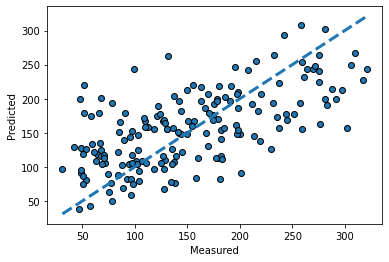

In [ ]:
from sklearn.linear_model import LinearRegression
import joblib
import pandas as pd 
import matplotlib.pyplot as plt

df_list = [pd.read_csv(filename) for filename in ['x_test.csv', 'x_train.csv', 'y_test.csv', 'y_train.csv']]
for df in df_list:
    del df["Unnamed: 0"]

df_tuple = tuple(df_list)
x_test, x_train, y_test, y_train = df_tuple[0].values, df_tuple[1].values, df_tuple[2].values, df_tuple[3].values

# Train and pickle a linear model
joblib.dump(LinearRegression().fit(x_train, y_train), "linear.pkl")

# Unpickle the linear model
linear = joblib.load("linear.pkl")
predictions = linear.predict(x_test)
plt.scatter(y_test, predictions, edgecolors=(0, 0, 0))
min_max = [y_test.min(), y_test.max()]
plt.plot(min_max, min_max, "--", lw=3)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.show()


## **Pickling** can be very useful after processing large datasets or training complex models. 

# **Cookiecutter prompts**

We can set up a Cookiecutter project by passing a template repository url or path to the `cookiecutter()` function.

# **Set up template**

For our first project template exercise, we will write a `cookiecutter.json` file that will contain defaults for our project template.

Our `cookiecutter.json` file will contain three keys:

*   `project`
*   `package`
*   `license`

The package key's value is a Jinja2 template string that will use the project key's value to create a snake_case package name by converting the input string to lowercase and replacing spaces with underscores.

Inside the *double curly braces* (`{{}}`) of the Jinja2 template string, we can use any Python code necessary to create the desired final value.

The `license` key's value is a list of possible license types:

*   `MIT`
*   `BSD`
*   `GPL3`

## json_path มาจากอะไรก็ไม่รู้ เลยเขียนมั่วๆเอา



In [ ]:
import json
from pprint import pprint
from pathlib import Path

json_path = Path("requirements.txt") # This is randomly written.

json_path.write_text(json.dumps({
    "project": "Creating Robust Python Workflows",
  	# Convert the project name into snake_case
    "package": "{{ cookiecutter.project.lower().replace(' ', '_') }}",
    # Fill in the default license value
    "license": ["MIT", "BSD", "GPL3"]
}))

pprint(json.loads(json_path.read_text()))

{'license': ['MIT', 'BSD', 'GPL3'],
 'package': "{{ cookiecutter.project.lower().replace(' ', '_') }}",
 'project': 'Creating Robust Python Workflows'}


#   **Create project**

We will first list the keys in a local `cookiecutter.json` file.

The paths to the template directory and its `cookiecutter.json` are assigned to `template_root` and `json_path` variables, respectively.

While `template_root` is a string, `json_path` is a `pathlib.Path` object.

We will use the `json` module to obtain `cookiecutter.json` file contents as a Python dictionary and unpack this dictionary into a list to see its keys.

We need to see the keys in the `cookiecutter.json` file to know how override the default project name in the template, because the key in the extra_context argument passed to the `cookiecutter()` function must match the corresponding key in `cookiecutter.json`.


In [13]:
!pip install cookiecutter

     |████████████████████████████████| 61kB 4.0MB/s 


In [9]:
%%file /content/Git_Prac/requirements.txt

matplotlib
numpy >= 1.18.4
pycodestyle>=2.4.0

Writing /content/Git_Prac/requirements.txt


In [10]:
import json
from pprint import pprint
from pathlib import Path, PosixPath
from cookiecutter import main


json_path = Path("requirements.txt") # This is randomly written.
template_root = Path('/content')

# Obtain keys from the local template's cookiecutter.json
keys = [*json.load(json_path.open())]
vals = "Your name here", "My Amazing Python Project"

# Create a cookiecutter project without prompting for input
main.cookiecutter(template_root.as_posix(), no_input=True,
                  extra_context=dict(zip(keys, vals)))

for path in pathlib.Path.cwd().glob("**"):
    print(path)

JSONDecodeError: ignored

# I could not replicate any more of these.  This course has scattered idea here and there and hard to follow.  Besides, the result cannot be replicated.  The way how the packge can be built is poorly explained and one cannot actually build a package from such a poor explanation.  (You better look at ***Developing Python Packages*** course instead.)  The ideas in each video are offered without actual applications and leave me no idea why they are done that way.


# **Executable Projects**

ลองดูว่าจะทำตามเลกเชอร์ได้ไหม

In [1]:
!mkdir "/content/prj"
!mkdir "/content/prj/src"
!mkdir "/content/prj/src/pkg"

In [2]:
%%file /content/prj/src/pkg/main.py
def print_name_and_file():
    print('Name is', __name__,
    'and file is', __file__)
if __name__ == "__main__":
    print_name_and_file()

Writing /content/prj/src/pkg/main.py


## ต้องมี setup.py ที่โฟลเดอร์ `prj`

In [3]:
%%file /content/prj/setup.py
import setuptools
setuptools.setup(
	name='prj',
	author='Arm Nakornthab',
	description='An executable package', 
	author_email='arm@arm.com',
	url='prj.com',
	version='0.0.1',
	license='mit'
)

Writing /content/prj/setup.py


In [5]:
import os
os.chdir("/content/prj")
!pip install -e .

Obtaining file:///content/prj
  Running setup.py develop for prj


## ลองสร้าง `__init__.py` ที่ทุกโฟลเดอร์ด้วย

# **Run a Module**

### You may need to restart runtime after installation.  I don't know why but sometimes the cell below fails to execute.

In [1]:
import prj
!python  -m prj.src.pkg.main

Name is __main__ and file is /content/prj/src/pkg/main.py


The above result happens because we are ***running the file instead of importing the function***.  The cell below add `__main__.py` file so that the project can be executed from outside of the projet using project name "`prj`".

In [2]:
%%file /content/prj/__main__.py
# Import module into __main__.py
from prj.src.pkg.main import print_name_and_file
if __name__ == "__main__":
    print_name_and_file()


Writing /content/prj/__main__.py


When we run the project, 

`__main__.py` will import the function from `main.py`.

In [3]:
!python -m prj


Name is prj.src.pkg.main and file is /content/prj/src/pkg/main.py


The cell above shows that `__name__` is not `__main__` because we are ***running the "project"*** instead of a specific file.

The cell below modify the `__main__.py` to import from a module as we normally do from inside a project (หรือบางทีเราใช้แค่ relative import เช่น `from . import pkg.main` ด้วยซ้ำ)

In [25]:
%%file /content/prj/__main__.py
# Import module into __main__.py
from src.pkg.main import print_name_and_file
if __name__ == "__main__":
    print_name_and_file()

Writing /content/prj/__main__.py


In [5]:
!python -m pkg

/usr/bin/python3: No module named pkg


To solve this we need to use `zipapp` module.

In [6]:
import zipapp
zipapp.create_archive('prj')
#!python -m zipapp prj ก็ได้

จากด้านบน จะมีไฟล์ใหม่ ชื่อ `prj.pyz` โผล่ขึ้นมา เมื่อรันในเซลด้านล่างจะพบว่า ...

In [7]:
!python prj.pyz

Name is src.pkg.main and file is prj.pyz/src/pkg/main.py


# **Pass arguments to the project**

We can also pass arguments to the project by including a Command Line Interface in `__main__.py`.

In [8]:
%%file /content/prj/__main__.py
# Import module into __main__.py
from src.pkg.main import print_name_and_file
import sys
if __name__ == "__main__":
    print_name_and_file()
    print(sys.argv)

Overwriting /content/prj/__main__.py


In [10]:
!python -m zipapp prj
!python prj.pyz hello

Name is src.pkg.main and file is prj.pyz/src/pkg/main.py
['prj.pyz', 'hello']


The result in above cell is a list containing the filename and argument.

# **Zipapp main argument**

zipapp can generate `__main__.py`.  We will show this by deleting the `__main__.py` first.

In [12]:
import os
import zipapp
os.remove("/content/prj/__main__.py")

Then we pass a string that points to the `print_name_and_file() `function as the main argument to `create_archive()`.


In [23]:
import zipapp
zipapp.create_archive("prj", main="src.pkg.main:print_name_and_file")

The `__main__.py` will be included in the zipped file `prj.pyz`, not in the original project.

# **Zipapp set interpreter**

Make the project to be command linw executable by specifying a Python interpreter path.

You can see the interpreter path by
```
import sys
print(sys.executable)
```
### ต้องใส่ไฟล์ `__main__.py` กลับมาก่อน ถ้าอยู่ใน `prj.pyz` มันรันไม่ได้



In [29]:
import zipapp

zipapp.create_archive("prj", interpreter="/usr/bin/python3")
# !python -m zipapp prj --python "/usr/bin/python3"

Below is the command line execution

In [28]:
!./prj.pyz

Name is src.pkg.main and file is ./prj.pyz/src/pkg/main.py


#  **Zipapp** 
## (In order to replicate this exercise, you have to create the local directories for the package "myproject".)

We will

1.  zip up a project called `myproject`
2.  make the zipped project ***command-line executable***
3.  create a `__main__.py` file in the zipped project

All with a single call to the `create_archive()` function from the standard library `zipapp` module.

The function we want `__main__.py` to run is called `print_name_and_file()`:

```
def print_name_and_file():
    print(f"Name is {__name__}. File is {__file__}.")
```
The `print_name_and_file()` function is in the `mymodule.py` file inside the top-level mypackage directory, as shown below:
```
myproject
└── mypackage
    ├── __init__.py
    └── mymodule.py
```




In [31]:
!mkdir "/content/myproject"
!mkdir "/content/myproject/mypackage/"

In [32]:
%%file /content/myproject/mypackage/mymodule.py
def print_name_and_file():
    print(f"Name is {__name__}. File is {__file__}.")

Writing /content/myproject/mypackage/mymodule.py


In [5]:
%%file /content/myproject/setup.py
import setuptools
setuptools.setup(
	name='myproject',
	author='Arm Nakornthab',
	description='An executable package', 
	author_email='arm@arm.com',
	url='prj.com',
	version='0.0.1',
	license='mit'
)

Writing /content/myproject/setup.py


In [6]:
%%file /content/myproject/requirements.txt
.

Writing /content/myproject/requirements.txt


In [7]:
import os
os.chdir("/content/myproject")
!pip install -e .

Obtaining file:///content/myproject
  Found existing installation: myproject 0.0.1
    Can't uninstall 'myproject'. No files were found to uninstall.
  Running setup.py develop for myproject


In [10]:
%%file /content/myproject/__main__.py
# Import module into __main__.py
from mypackage.mymodule import print_name_and_file
if __name__ == "__main__":
    print_name_and_file()

Writing /content/myproject/__main__.py


In [1]:
import myproject
import zipapp
import subprocess

zipapp.create_archive(
    # Zip up a project called "myproject"
    "myproject",                    
    interpreter="/usr/bin/python3", # Note that the interpreter is different from which platform you are using.
    # Generate a __main__.py file
    main="mypackage.mymodule:print_name_and_file")

# subprocess.run หมายถึงการรันด้วย shell command ก็ได้
print(subprocess.run(["python", "myproject.pyz"],stdout=-1).stdout.decode())

Name is mypackage.mymodule. File is myproject.pyz/mypackage/mymodule.py.



In [7]:
# This is the command-line execution of the project.
!pwd
!./myproject.pyz

/content
Name is mypackage.mymodule. File is ./myproject.pyz/mypackage/mymodule.py.


In the cell above, we created a `__main__.py` file for our .`pyz` file automatically, but if we want to pass shell arguments to our project, we will have to write our own `__main__.py`. 

Note again that the cell above change the interpreter according to
```
import sys
print(sys.executable)
```



In [2]:
import sys
print(sys.executable)

/usr/bin/python3


#  **Argparse main()**
Next, we'll create a `__main__.py` file to pass shell arguments to `classify()` or `regress()`, functions based on code we wrote in Chapter 1. อยู่ตรงไหนของ chapter 1 วะ ไอ้เห้นี่ ?



In [10]:
# ถ้าเรียน sklearn มาก่อน อาจจะไม่ต้อง google ขนาดนี้
from importlib import import_module
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score

# ไปเอาฟังก์ชันนี้มาจาก inspect module โดยใช้ inspect.getsource(classify)
def classify(dataset='digits', model='linear_model.LogisticRegression'):
    data = get_dataset(dataset)
    x_train, x_test, y_train, y_test = split_data(data)
    classification_model = get_model(model=model)
    fit = classification_model.fit(x_train, y_train)
    predictions = fit.predict(x_test)
    confusion_matrix_plot(fitted=predictions, target=y_test)

def get_dataset(name: str):
    """load data from sklearn.datasets"""
    datasets = import_module('sklearn.datasets')
    load_dataset = getattr(datasets, 'load_' + name)
    dataset = load_dataset()
    return dataset

def split_data(dataset, train_size=0.8, test_size=0.2, random_state=0):
    """split data into train and test sets"""
    splits = train_test_split(
        dataset['data'], dataset['target'],
        train_size=train_size,
        test_size=test_size,
        random_state=random_state
    )
    return splits



def confusion_matrix_plot(fitted, target) -> None:
    confmat = confusion_matrix(y_true=target, y_pred=fitted)
    acc = accuracy_score(y_true=target, y_pred=fitted)
    sns.heatmap(confmat, square=True, annot=True, cbar=False)
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.title('Accuracy = {acc:.0%}'.format(acc=acc))
    plt.show()

def get_fitted(model, x_train, y_train, x_test):
    fit = model.fit(x_train, y_train)
    return fit.predict(x_test)

def get_model(model):
    """get a scikit-learn model"""
    model_type, model_name = model.split('.')
    models = import_module('sklearn.' + model_type)
    model = getattr(models, model_name)
    return model()

def residual_plot(fitted, target):
    mse = mean_squared_error(y_true=target, y_pred=fitted)
    r2 = r2_score(y_true=target, y_pred=fitted)
    sns.residplot(x=fitted, y=target, lowess=True, line_kws={'color': 'red'})
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('MSE = {mse:.0f} and $R^2$ = {r2:.0%}'.format(mse=mse, r2=r2))
    plt.show()

def regress(dataset='diabetes', model='linear_model.LogisticRegression'):
    data = get_dataset(dataset)
    x_train, x_test, y_train, y_test = split_data(data)
    regression_model = get_model(model=model)
    fit = regression_model.fit(x_train, y_train)
    predictions = fit.predict(x_test)
    residual_plot(fitted=predictions, target=y_test)

We will provide **default** values for all arguments, so that the code can run even if no shell arguments are provided.

To do this, we'll 

*   instantiate the `ArgumentParser` class from the `argparse` module as `parser`
*   Use its `add_argument()` method to create arguments called `dataset` and `model` with the following defaults: `diabetes` and `linear_model.Ridge`.
*   Setting `nargs="?"` means that each argument can accept ***either one value or none at all***.
*   Create a keyword arguments (`kwargs`) variable and unpack `kwargs` into the `classify()` or `regress()` functions in the function's return statement.

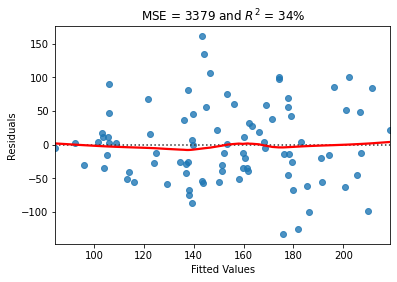

In [12]:
import argparse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# ไม่รู้เหมือนกันว่า ทำไมต้องมี
import sys
sys.argv=['']
del sys

def main():
    parser = argparse.ArgumentParser(description="Scikit datasets only!")
    # Set the default for the dataset argument
    parser.add_argument("dataset", nargs="?", default='diabetes')
    parser.add_argument("model", nargs="?", default="linear_model.Ridge")
    args = parser.parse_args()  
    # Create a dictionary of the shell arguments
    kwargs = dict(dataset=args.dataset, model=args.model)
    return (classify(**kwargs) if args.dataset in ("digits", "iris", "wine")
            else regress(**kwargs) if args.dataset in ("boston", "diabetes")
            else print(f"{args.dataset} is not a supported dataset!"))

main()

args = Namespace(dataset='boston', model='linear_model.Ridge')
args.dataset = boston
args.model = linear_model.Ridge
{'dataset': 'boston', 'model': 'linear_model.Ridge'}


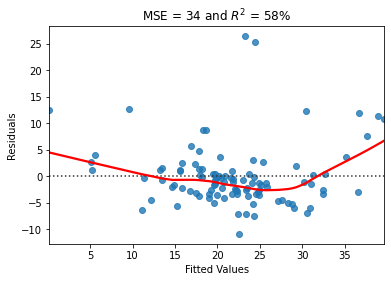

In [21]:
parser = argparse.ArgumentParser(description="Scikit datasets only!")
parser.add_argument("dataset", nargs="?", default='boston')
parser.add_argument("model", nargs="?", default="linear_model.Ridge")
args = parser.parse_args()
print(f"args = {args}")
print(f"args.dataset = {args.dataset}")
print(f"args.model = {args.model}")

kwargs = dict(dataset=args.dataset, model=args.model)
print(kwargs)
# ให้สังเกตว่า การ unpack dictionary นั้น ทำเปล่าไม่ได้ จะ error ต้องทำเวลาเขียน string format หรือเวลาจะใส่ในฟังก์ชัน
# def regress(dataset='diabetes', model='linear_model.LogisticRegression'):
regress(**kwargs)

{'dataset': 'digits', 'model': 'linear_model.LogisticRegression'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


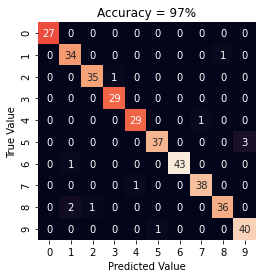

In [10]:
import argparse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# ไม่รู้เหมือนกันว่า ทำไมต้องมี
import sys
sys.argv=['']
del sys

def main():
    parser = argparse.ArgumentParser(description="Scikit datasets only!")
    # Set the default for the dataset argument
    parser.add_argument("dataset", nargs="?", default='digits')
    parser.add_argument("model", nargs="?", default='linear_model.LogisticRegression')
    args = parser.parse_args()
    # Create a dictionary of the shell arguments
    kwargs = dict(dataset=args.dataset, model=args.model)
    print(kwargs)
    return (classify(**kwargs) if args.dataset in ("digits", "iris", "wine")
            else regress(**kwargs) if args.dataset in ("boston", "diabetes")
            else print(f"{args.dataset} is not a supported dataset!"))

main()

In [23]:
import argparse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# ไม่รู้เหมือนกันว่า ทำไมต้องมี
import sys
sys.argv=['']
del sys

def main():
    parser = argparse.ArgumentParser(description="Scikit datasets only!")
    # Set the default for the dataset argument
    parser.add_argument("dataset", nargs="?", default='XXX')
    parser.add_argument("model", nargs="?", default='linear_model.LogisticRegression')
    args = parser.parse_args()
    # Create a dictionary of the shell arguments
    kwargs = dict(dataset=args.dataset, model=args.model)
    return (classify(**kwargs) if args.dataset in ("digits", "iris", "wine")
            else regress(**kwargs) if args.dataset in ("boston", "diabetes")
            else print(f"{args.dataset} is not a supported dataset!"))

main()

XXX is not a supported dataset!


# **Jupyter nbconvert**

The Jupyter `nbconvert` library. `Nbconvert` can execute notebooks but cannot pass arguments to notebooks. For that, we will need the following package:

# **papermill** 

ในโค้ดด้านล่างนี้ เราใช้ไฟล์ `sklearn.ipynb` เป็นตัวอย่าง เพื่อให้ดูว่าคำสั่ง `jupyter nbconvert` มันทำอะไร ไฟล์ `output.ipynb` ในที่นี้ ก็หน้าตาเหมือนเดิมกับ `sklearn.ipynb`

In [6]:
import nbconvert
# Can execute notebooks but 
# Cannot pass arguments to notebooks

!jupyter nbconvert --execute --to notebook sklearn.ipynb --output output.ipynb

[NbConvertApp] Converting notebook sklearn.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Writing 3763 bytes to output.ipynb


# **Jupyter nbformat**

We can create "parameters" cells programmatically using `nbformat` by


*   reading in a notebook with the `read()` function
*   editing the notebook's first cell to add a parameters `tag` and a default `parameter`
*   overwriting the original notebook file with the `write()` function



In [1]:
import nbformat
from nbconvert.exporters import get_exporter
from pathlib import Path

# ใช้ mynotebook จากบทที่ 2
nb = nbformat.read('mynotebook.ipynb', as_version=4)
nb.cells[0].metadata = {'tags':['parameters']}
nb.cells[0].source = "alpha = 0.4" # บรรทัดนี้จะไปเปลี่ยน cell แรก ให้ออกมาเป็น alpha = 0.4
nbformat.write(nb, 'mynotebook.ipynb')

html_exporter = get_exporter('html')()
contents = html_exporter.from_filename('mynotebook.ipynb')[0]
Path('mynotebook_ch4.html').write_text(contents)

274542

# **Parametrize**

*   Working in Python files allows us to save parameter names and values as lists, and create a dictionary of custom parameters. 

*   We can then pass this dictionary to the `papermill.execute_notebook()` function as its parameters argument.

In [5]:
%%file mynotebook.ipynb

{
 "cells": [
  {
   "cell_type": "markdown",
   "id": "a053d8e6",
   "metadata": {
    "tags": [
     "parameters"
    ]
   },
   "source": [
    "alpha = 0.4"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "1ec0fdcc",
   "metadata": {},
   "outputs": [],
   "source": [
    "import numpy as np\n",
    "import matplotlib.pyplot as plt\n",
    "N = 50\n",
    "x = np.random.rand(N)\n",
    "y = np.random.rand(N)\n",
    "colors = np.random.rand(N)\n",
    "area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii\n",
    "plt.scatter(x, y, s=area, c=colors, alpha=0.5)\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "42caa1bd",
   "metadata": {},
   "source": [
    "# Discussion\n",
    "As you can see, \n",
    "matplotlib is verbose, \n",
    "but is also easy to read and can make cool plots!"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}


Writing mynotebook.ipynb


ก่อนหน้านี้ ตรง metadata ของไฟล์ mynotebook.ipynb มันว่างๆอยู่ ต้องระบุ

```
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  }
 },
```

ภาษาว่าเป็น `python3` ไม่งั้น จะเกิด language error เขียนทับไม่ได้

# **Execute notebook with papermill**

*   We can either parametrize notebooks with the `papermill.execute_notebook()` function and the `papermill` shell command. The arguments accepted by `papermill.execute_notebook()` and the `papermill` shell command are similar.



In [6]:
from nbconvert.exporters import get_exporter
from pathlib import Path

import papermill as pm
names = ['alpha', 'ratio']
values = [0.6, 0.4]
param_dict = dict(zip(names, values))
print(param_dict, "\n")

# Use mynotebook.ipynb as an input
pm.execute_notebook('mynotebook.ipynb','OUT.ipynb', kernel_name='python3',parameters=param_dict)

# See what the output looks like.
html_exporter = get_exporter('html')()
contents = html_exporter.from_filename('OUT.ipynb')[0]
Path('OUT.html').write_text(contents)

{'alpha': 0.6, 'ratio': 0.4} 



304373

# **Notebook parameters**
Below, we create parameters for a Random Forest model.

In [2]:
# Parameters
dataset_name = "diabetes"
model_type = "ensemble"
model_name = "RandomForestRegressor"
hyperparameters = {"max_depth": 3, "n_estimators": 100, "random_state": 0}

# **Use parameters inside notebooks**

*   We define a `get_model()` function in the cell below to use those parameters in the cell just above.

*   `get_model()` function  can retrieve any `scikit-learn` model when provided with the correct arguments. 
*   We then create `lists` of argument names and values that can be paired up using the `zip()` function and unpacked as a dictionary into the function call.

In [4]:
from importlib import import_module
from typing import Optional, Dict

def get_model(model_type, model_name, hyperparameters=None):
    model = getattr(import_module('sklearn.'+model_type), model_name)
    return model(**hyperparameters) if hyperparameters else model()

keys = ['model_type', 'model_name', 'hyperparameters']
vals = [model_type, model_name, hyperparameters]
model = get_model(**dict(zip(keys, vals)))

#  **Scrapbook**
The `scrapbook` library allows us to 

*   record values with the `glue()` function 
*   `read_notebook()` to retrieve recorded values as  

   *   dictionary with the `scraps` attribute 
   *   dataframe via the `scrap_dataframe` attribute. 
   
*   We can also access `papermill_metrics` 
*   access `parameter_dataframe`. 

These dataframe attributes allow us to use `pandas` to work with data obtained from notebooks.

#  **Parametrize notebooks**

To practice notebook parametrization, we will work with a Jupyter notebook called `sklearn.ipynb`.

This notebook can run any `scikit-learn` model on any built-in `scikit-learn` dataset.

The dataset and model that the notebook will use depend on the four parameters it receives.

To find the parameter names, we will use `papermill` to look at the source attribute of an `nbformat NotebookNode` object cell.

We will need the parameter names to create a dictionary of parameters that we will then use to execute the notebook.

In [1]:
!pip install papermill

     |████████████████████████████████| 143kB 11.9MB/s 
     |████████████████████████████████| 727kB 11.2MB/s 
     |████████████████████████████████| 747kB 23.8MB/s 
     |████████████████████████████████| 122kB 32.0MB/s 
  Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5


In [2]:
!pip install "ipython>=7.8.0"

     |████████████████████████████████| 788kB 6.6MB/s 
     |████████████████████████████████| 368kB 42.0MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.24.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [3]:
!pip install scrapbook

# In order for the code below to work, you must 



*   `!pip install "ipython>=7.8.0"`
*   `!pip install scrapbook`
*   `!pip install papermill`

Note that ipython on colab is of version 5.5 so it cannot be used.



In [2]:
import nbformat

print(nbformat.read("sklearn.ipynb", as_version=4).cells[0].metadata, "\n")
print(nbformat.read("sklearn.ipynb", as_version=4).cells[0].source)

keys = ["dataset_name", "model_type", "model_name", "hyperparameters"]
vals = ["diabetes", "ensemble", "RandomForestRegressor", dict(max_depth=3, n_estimators=100, random_state=0)]
parameter_dictionary = dict(zip(keys, vals))
display(parameter_dictionary)

{'tags': ['parameters']} 

dataset_name = 'diabetes'
model_type = 'linear_model'
model_name = 'LinearRegression'
hyperparameters = None



{'dataset_name': 'diabetes',
 'model_type': 'ensemble',
 'model_name': 'RandomForestRegressor',
 'hyperparameters': {'max_depth': 3, 'n_estimators': 100, 'random_state': 0}}

In [6]:
# Read in the notebook to find the default parameter names
import nbformat
import papermill as pm
from pprint import pprint
import scrapbook

pprint(nbformat.read("sklearn.ipynb", as_version=4).cells[0].source)
keys = ["dataset_name", "model_type", "model_name", "hyperparameters"]
vals = ["diabetes", "ensemble", "RandomForestRegressor", dict(max_depth=3, n_estimators=100, random_state=0)]
parameter_dictionary = dict(zip(keys, vals))

# Execute the notebook with custom parameters
# "sklearn.ipynb" is input
# "rf_diabetes.ipynb" is output
pprint(pm.execute_notebook("sklearn.ipynb", "rf_diabetes.ipynb", kernel_name="python3", parameters=parameter_dictionary))  

("dataset_name = 'diabetes'\n"
 "model_type = 'linear_model'\n"
 "model_name = 'LinearRegression'\n"
 'hyperparameters = None\n')



{'cells': [{'cell_type': 'code',
            'execution_count': 1,
            'id': 'b344bb60',
            'metadata': {'execution': {'iopub.execute_input': '2021-06-09T08:58:03.099634Z',
                                       'iopub.status.busy': '2021-06-09T08:58:03.098779Z',
                                       'iopub.status.idle': '2021-06-09T08:58:03.103910Z',
                                       'shell.execute_reply': '2021-06-09T08:58:03.103291Z'},
                         'papermill': {'duration': 0.012429,
                                       'end_time': '2021-06-09T08:58:03.104059',
                                       'exception': False,
                                       'start_time': '2021-06-09T08:58:03.091630',
                                       'status': 'completed'},
                         'tags': ['parameters']},
            'outputs': [],
            'source': "dataset_name = 'diabetes'\n"
                      "model_type = 'linear_model'\n"
   

We accessed a notebook cell and executed a notebook programmatically using `papermill`.

#   **Summarize notebooks**

We will use scrapbook to

*   read in a Jupyter notebook called `rf_diabetes.ipynb` (This file appears as an output of the cell just above.)
*   create a dataframe that contains variables that were saved in the notebook with the `glue()` function
*   create a second dataframe of parameters that were passed to the notebook by `papermill`

This exercise demonstrates how we can use `scrapbook` to access notebook data.

In [8]:
import scrapbook as sb

# Assign the scrapbook notebook object to nb which is a scrapbook noteboook object
nb = sb.read_notebook("rf_diabetes.ipynb")

# Create a dataframe of scraps (recorded values)
scrap_df = nb.scrap_dataframe
display(scrap_df)
display(nb.parameter_dataframe)

,name,data,encoder,display,filename
0,r2,0.343027,json,None,rf_diabetes.ipynb
1,mse,3462.495437,json,None,rf_diabetes.ipynb


,name,value,type,filename
0,dataset_name,diabetes,parameter,rf_diabetes.ipynb
1,hyperparameters,"{'max_depth': 3, 'n_estimators': 100, 'random_...",parameter,rf_diabetes.ipynb
2,model_name,RandomForestRegressor,parameter,rf_diabetes.ipynb
3,model_type,ensemble,parameter,rf_diabetes.ipynb


`r2 `and `mse` result above come from `scrapbook.glue()`
```
sb.glue("r2", r2_score(y_test, y_pred))
sb.glue("mse", mean_squared_error(y_test, y_pred))
```

The above lines were typed in `sklearn.ipynb`.  When it was executed via `papermill` to generate output as `rf_diabetes.ipynb`, the `sb.glue()` function records these `r2` and `mse` values.

# **Parallel computing**

## **Dask dataframe**

To practice working with Dask dataframes, we will

*  read in a `.csv` file containing the `diabetes` dataset as `Dask` dataframe,
*  create a new binary variable from the age column, and
*  compute the means of all variables for the resulting two age groups.

***Note***: You must install `fsspec` first.



In [12]:
!python -m pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 122kB 6.9MB/s 


In [14]:
import dask.dataframe as dd

# Read in a csv file using a dask.dataframe method
df = dd.read_csv("diabetes.csv")

df["bin_age"] = (df.age > 0).astype(int)

# Compute the columns means in the two age groups
print(df.groupby("bin_age").mean().compute())

         Unnamed: 0       age       sex  ...       tch       ltg       glu
bin_age                                  ...                              
0        210.930693 -0.042991 -0.008306  ... -0.006677 -0.009723 -0.011084
1        228.554167  0.036184  0.006991  ...  0.005620  0.008184  0.009329

[2 rows x 11 columns]


#  **Joblib**

*   We will use the grid search to find the optimal hyperparameters for an elastic net model.

*   To speed up the search, we will use the `joblib` `parallel_backend()` function.

*   The scikit-learn `GridSearchCV` class has already been instantiated as `engrid` with a grid of two hyperparameters:

  *   `l1_ratio`: the mix of Lasso (L1) and Ridge (L2) regression penalties used to shrink model coefficients
  *   `alpha`: the severity of the penalty

Applying penalties to model coefficients helps to avoid overfitting and produce models that perform better on new data.

We will use the optimal `l1_ratio` to create a `enet_path()` plot that shows how coefficients shrink as `alpha` increases.

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


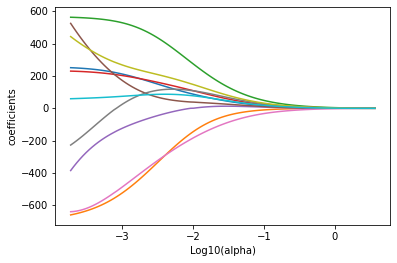

In [2]:
from dask.distributed import Client
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet, enet_path
from sklearn.datasets import load_diabetes
from numpy import array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_list = [pd.read_csv(filename) for filename in ['x_test.csv', 'x_train.csv', 'y_test.csv', 'y_train.csv']]
for df in df_list:
    del df["Unnamed: 0"]

df_tuple = tuple(df_list)
x_test, x_train, y_test, y_train = df_tuple[0].values, df_tuple[1].values, df_tuple[2].values, df_tuple[3].values
y_test, y_train = y_test.flatten(), y_train.flatten()

engrid = GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([0.    , 0.0005, 0.001 , 0.0015]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

def plot_enet(alphas_enet, coefs_enet):
    for coef_e in coefs_enet:
	    plt.plot(np.log10(alphas_enet), coef_e)

    plt.xlabel('Log10(alpha)')
    plt.ylabel('coefficients')
    plt.show()

# Set up a Dask client with 4 threads and 1 worker
#Client(processes=False, threads_per_worker=1, n_workers=1)

# Run grid search using joblib and a Dask backend
# with joblib.parallel_backend("dask"):
engrid.fit(x_train, y_train)

plot_enet(*enet_path(x_test, y_test, eps=5e-5, fit_intercept=False,
                    l1_ratio=engrid.best_params_["l1_ratio"])[:2])

เหมือนว่า Colab จะรัน `dask Client` ไม่ได้

In [ ]:
from dask.distributed import Client
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet, enet_path
from sklearn.datasets import load_diabetes
from numpy import array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_list = [pd.read_csv(filename) for filename in ['x_test.csv', 'x_train.csv', 'y_test.csv', 'y_train.csv']]
for df in df_list:
    del df["Unnamed: 0"]

df_tuple = tuple(df_list)
x_test, x_train, y_test, y_train = df_tuple[0].values, df_tuple[1].values, df_tuple[2].values, df_tuple[3].values
y_test, y_train = y_test.flatten(), y_train.flatten()

engrid = GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([0.    , 0.0005, 0.001 , 0.0015]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

def plot_enet(alphas_enet, coefs_enet):
    for coef_e in coefs_enet:
	    plt.plot(np.log10(alphas_enet), coef_e)

    plt.xlabel('Log10(alpha)')
    plt.ylabel('coefficients')
    plt.show()

# Set up a Dask client with 4 threads and 1 worker
Client(processes=False, threads_per_worker=4, n_workers=1)

# Run grid search using joblib and a Dask backend
with joblib.parallel_backend("dask"):
    engrid.fit(x_train, y_train)

plot_enet(*enet_path(x_test, y_test, eps=5e-5, fit_intercept=False,
                    l1_ratio=engrid.best_params_["l1_ratio"])[:2])

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend DaskDistributedBackend with 4 concurrent workers.
tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <zmq.eventloop.ioloop.ZMQIOLoop object at 0x0FE04C90>>, <Task finished coro=<DaskDistributedBackend.apply_async.<locals>.f() done, defined at C:\ProgramData\Anaconda3\lib\site-packages\joblib\_dask.py:323> exception=TypeError('__dask_distributed_pack__() takes 3 positional arguments but 4 were given')>)
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
    ret = callback()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 765, in _discard_future_result
    future.result()
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\_dask.py", line 328, in f
    batch, tasks=tasks, key=key, **self.submit_kwargs
  File "C:\ProgramData\Anaconda3\lib\site-packages\distributed\client.py

tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <zmq.eventloop.ioloop.ZMQIOLoop object at 0x0FE04C90>>, <Task finished coro=<DaskDistributedBackend.apply_async.<locals>.f() done, defined at C:\ProgramData\Anaconda3\lib\site-packages\joblib\_dask.py:323> exception=TypeError('__dask_distributed_pack__() takes 3 positional arguments but 4 were given')>)
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
    ret = callback()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 765, in _discard_future_result
    future.result()
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\_dask.py", line 328, in f
    batch, tasks=tasks, key=key, **self.submit_kwargs
  File "C:\ProgramData\Anaconda3\lib\site-packages\distributed\client.py", line 1604, in submit
    actors=actor,
  File "C:\ProgramData\Anaconda3\lib\site-pac